In [1]:
#import the pRNN class
from prnn.utils.predictiveNet import PredictiveNet
from prnn.utils.env import make_env
from prnn.utils.agent import RandomActionAgent

import matplotlib.pyplot as plt
import numpy as np

wandb not installed, will not log to wandb


In [2]:
#Make a gridworld environment
env_package = 'gym-minigrid' 
env_key = 'MiniGrid-LRoom-18x18-v0'
act_enc = 'SpeedHD' #actions will be encoded as speed and one hot-encoded head direction

env = make_env(env_key=env_key, package=env_package, act_enc=act_enc)

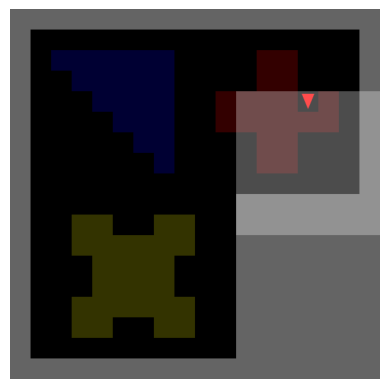

In [3]:
#Let's take a look at the environment
env.reset()
render = env.render()

plt.figure()
plt.subplot(1,1,1)
plt.imshow(render)
plt.axis('off')
plt.show()

In [6]:
#Make a pRNN
num_neurons = 500
pRNNtype = 'thRNN_2win' #This will train a 5-step masked pRNN. 
                        #For a rollout network use 'thcycRNN_5win_full'

predictiveNet = PredictiveNet(env, hidden_size=num_neurons, pRNNtype=pRNNtype)

In [7]:
#specify an action policy (agent)
action_probability = np.array([0.15,0.15,0.6,0.1,0,0,0])
agent = RandomActionAgent(env.action_space, action_probability)


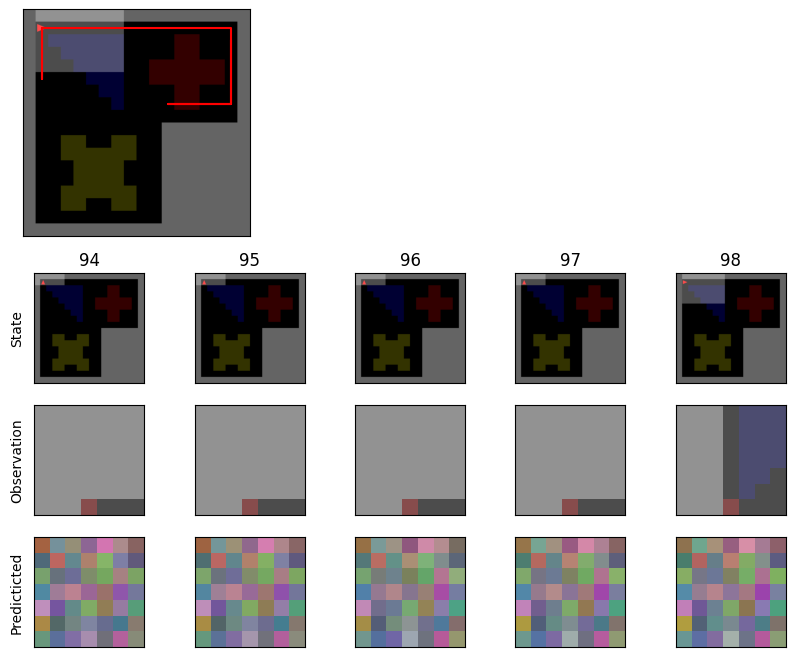

In [32]:
#run a sample trajectory (note: predictions will be garbage, agent is untrained)
predictiveNet.plotSampleTrajectory(env,agent)
plt.show()


In [33]:
#Run one training epoch of 500 trials, each 500 steps long
sequence_duration = 500
num_trials = 500

predictiveNet.trainingEpoch(env, agent,
                            sequence_duration=sequence_duration,
                            num_trials=num_trials)

Training pRNN on cuda...
loss: 0.032, sparsity: 0.39, meanrate: 0.38 [    0\  500]
loss: 0.015, sparsity: 0.37, meanrate: 0.39 [   50\  500]
loss: 0.015, sparsity: 0.38, meanrate: 0.39 [  100\  500]
loss: 0.015, sparsity: 0.4, meanrate: 0.39 [  150\  500]
loss: 0.014, sparsity: 0.4, meanrate: 0.39 [  200\  500]
loss: 0.015, sparsity: 0.41, meanrate: 0.38 [  250\  500]
loss: 0.013, sparsity: 0.42, meanrate: 0.38 [  300\  500]
loss: 0.013, sparsity: 0.41, meanrate: 0.39 [  350\  500]
loss: 0.014, sparsity: 0.43, meanrate: 0.39 [  400\  500]
loss: 0.011, sparsity: 0.43, meanrate: 0.39 [  450\  500]
loss: 0.012, sparsity: 0.43, meanrate: 0.39 [  499\  500]
Epoch Complete. Back to the cpu


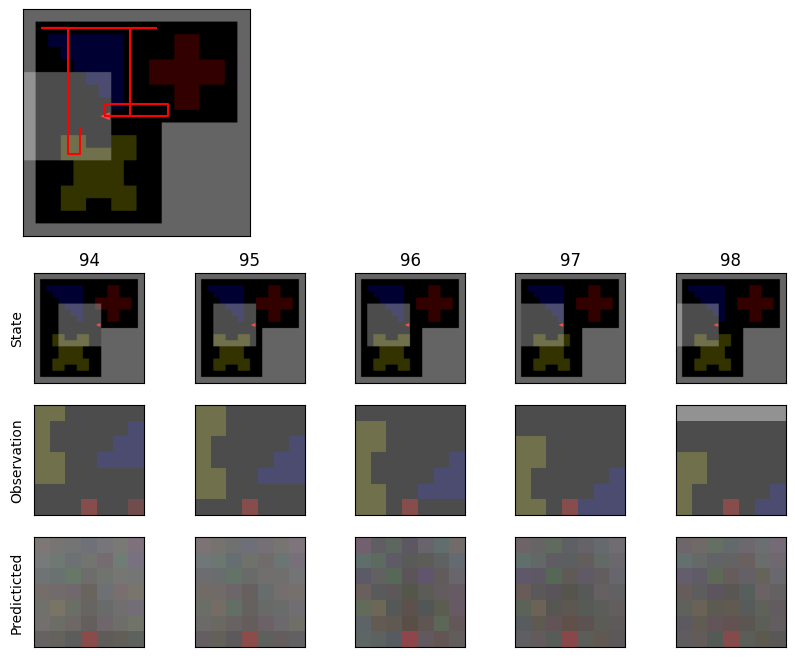

In [34]:
#run a sample trajectory. did the predictions get better?
predictiveNet.plotSampleTrajectory(env,agent)
plt.show()


/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.9/site-packages/pynapple/process/tuning_curves.py:378: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.9/site-packages/pynapple/process/tuning_curves.py:389: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Training Decoder on cuda...
loss: 5.884181 [    0\ 5000]
loss: 3.769964 [  500\ 5000]
loss: 3.337918 [ 1000\ 5000]
loss: 3.090721 [ 1500\ 5000]
loss: 2.912314 [ 2000\ 5000]
loss: 2.789866 [ 2500\ 5000]
loss: 2.675241 [ 3000\ 5000]
loss: 2.630086 [ 3500\ 5000]
loss: 2.566926 [ 4000\ 5000]
loss: 2.548851 [ 4500\ 5000]
loss: 2.482032 [ 4999\ 5000]
Training Complete. Back to the cpu


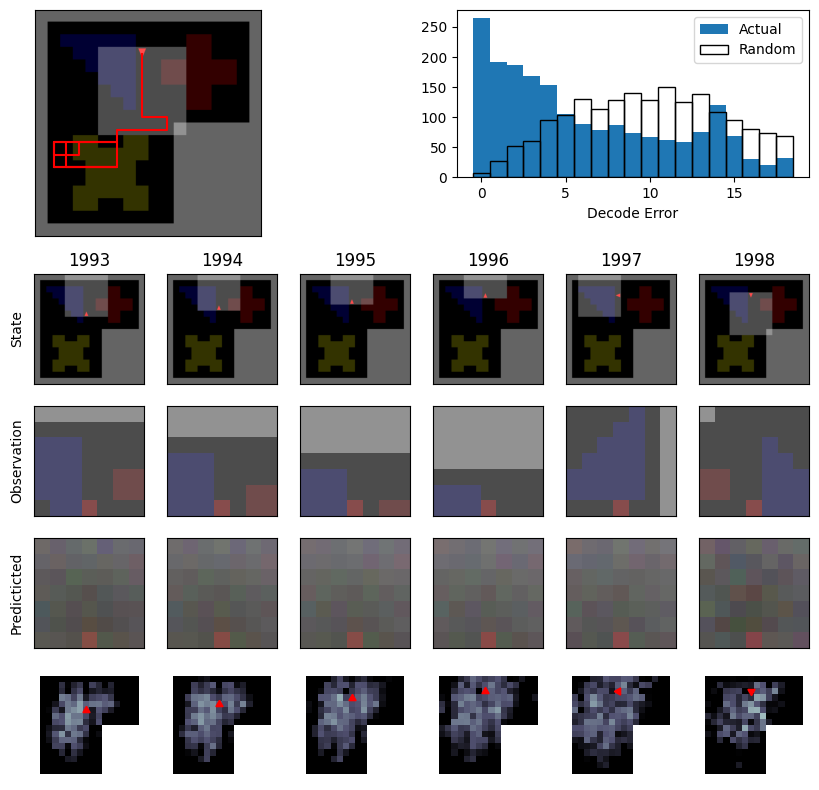

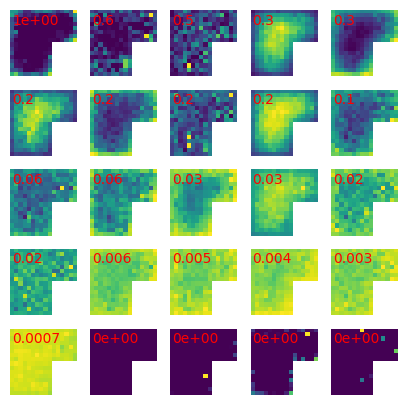

In [37]:
#Let's take a look at the spatial position decoding and tuning curves 
place_fields, SI, decoder = predictiveNet.calculateSpatialRepresentation(env,agent,
                                                trainDecoder=True, saveTrainingData=True)

predictiveNet.calculateDecodingPerformance(env,agent,decoder)
predictiveNet.plotTuningCurvePanel()


In [ ]:
#Looks like we'll need to train some more. This will take a while... 
#Often we like to precompute a dataset of random trajectories to speed things up
#  - check out dataloader_example.ipynb for how to do this

#the script trainNet.py can be used to train a network for many epochs and save the results
#this can be called in a bash scipt to submit a job using e.g. 
# trainNet.py --savefolder='examplenet/' --lr=2e-3 --numepochs=50 --batchsize=16 --pRNNtype='thRNN_5win' --actenc='SpeedHD'
#You'll want to modify it or make your own, to fit the needs of your own project
#An example of how to call it, and submit on a GPU cluster is in trainNet_slurm.sh 